# customer segment

#### Mengheng Xue

#### Due: 2019-04-03

### import libraries

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# ====================plot setting ===============
pd.options.display.max_colwidth = 70

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.8)

### import dataset

In [4]:
# Importing the dataset
dataset = pd.read_csv('Mocked_Customer_Data.csv')
dataset.head(5)
dataset.columns

Index(['cust_id', 'gender', 'marrital', 'age', 'home_owner', 'num_cont',
       'tot_bill', 'tot_call', 'tot_bal', 'fortune', 'tot_bytes', 'tot_air',
       'num_out', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air'],
      dtype='object')

### K-mean clustering

In [26]:
num_vars = ['age', 'tot_bill', 'tot_call','tot_bytes', 'tot_air', 'num_out', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air']
X = dataset.loc[:, num_vars].values

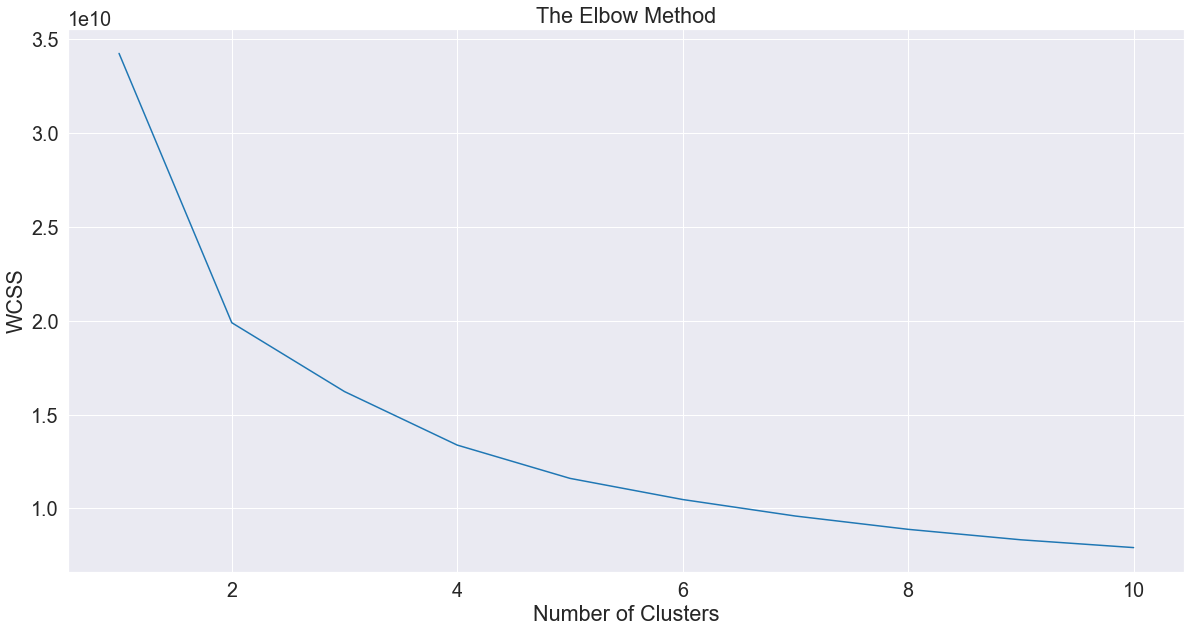

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

+ based on the elbow method we find the optimal number of clusters is 5. 

In [28]:
# Applying the k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

array([1, 1, 1, ..., 4, 2, 2])

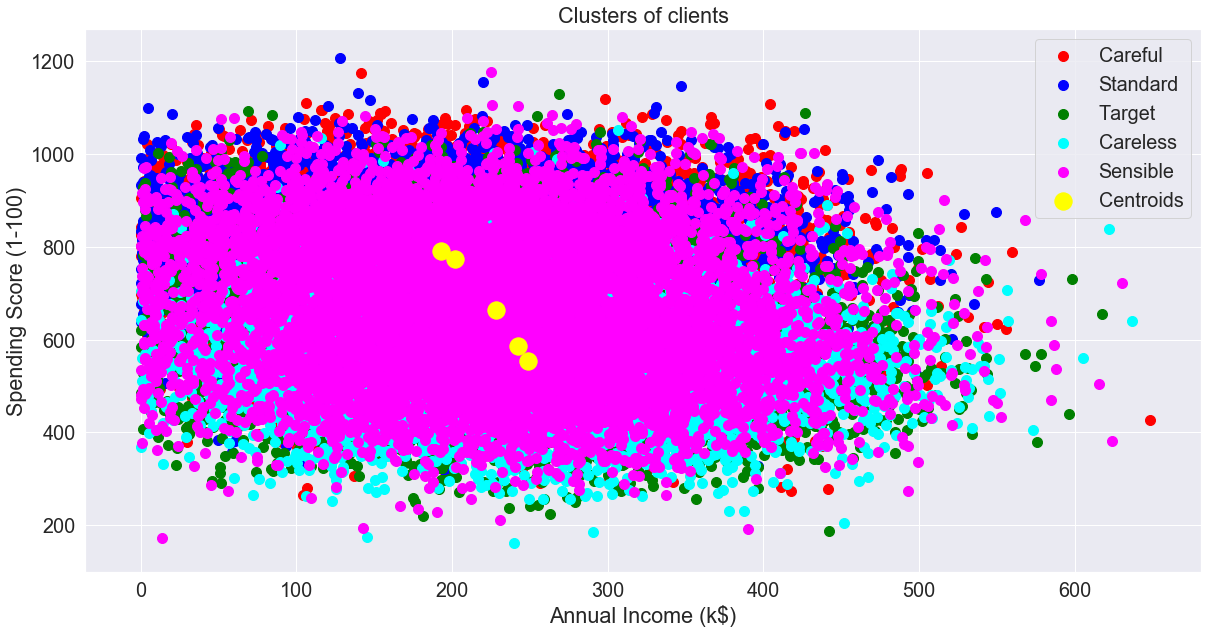

In [25]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, -2], X[y_kmeans == 0, -1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1,  -2], X[y_kmeans == 1, -1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2,  -2], X[y_kmeans == 2, -1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3,  -2], X[y_kmeans == 3, -1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4,  -2], X[y_kmeans == 4, -1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,  -2],  kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()